In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
import pickle
import os
import multiprocessing

from PF_Aso1_0 import *

workdir = os.path.dirname(os.path.dirname(os.getcwd()))
srcdir = os.getcwd()
outputdir = workdir + '/output/Aso1_0/'

In [2]:
seed = 7
T = 300
N = 10000

true_θ = {'Azo' : np.zeros((2,1)),\
          'Azz' : np.array([[1, 1], [0, 0.5]]),\
          'Aso' : np.array([[0.],[8.],[6.]]),\
          'Bz'  : np.array([[1., 0],[0, .5]]),\
          'Ass' : np.array([[0.6, 0.1, 0.1],\
                            [0.2, 0.5, 0.3],\
                            [0.1, 0.2, 0.4]]),\
          'Bs'  : np.array([[3,   0,   0],\
                            [0.5, 2,   0],\
                            [0.3, 0.2, 1]])}
obs_series = simulate(true_θ, T)
casedir = outputdir + 'seed = ' + str(seed) + ', T = ' + str(T) + ', N = ' + str(N) + '/'

In [37]:
Bs = true_θ['Bs']
(P, L, U) = sp.linalg.lu(Bs@Bs.T)
D = np.diag(np.diag(U))   # D is just the diagonal of U
U /= np.diag(U)[:, None]  # Normalize rows of U
J = L
Δ = D
J_inv = sp.linalg.inv(J)
j21 = J_inv[1,0]; j31 = J_inv[2,0]; j32 = J_inv[2,1]

In [45]:
j32

-0.10000000000000002

In [51]:
(J_inv@Bs)[2,2]

1.0

In [63]:
np.mean([i['2nd'][3] for i in H_TEMP_series[-1]])

26.95266076930412

In [64]:
np.mean([i['1st'][3] for i in H_TEMP_series[-1]])

682.3341624217752

In [65]:
np.mean([i['3rd'][3] for i in H_TEMP_series[-1]])

2273.930972960597

In [66]:
np.mean([i['4th'][3] for i in H_TEMP_series[-1]])

916.7696012405488

In [67]:
np.mean([i['5th'][3] for i in H_TEMP_series[-1]])

46.16294549703379

In [61]:
for t in range(T):
    print(np.mean([i['2nd'][3] for i in H_TEMP_series[t]]))

1.0
1.4779755348222443
1.7991106580164167
2.339996620639692
2.1655125923878935
2.0923070095776395
2.088857108427788
2.611544175146051
3.4481984265292462
3.942625291240953
3.8797849842720353
4.186949093778727
4.216557414733565
4.64778852570259
4.723444057970056
5.634640247714648
6.043687448141001
6.365842266580485
6.19761502972911
6.499640592611479
6.885993965794581
7.122695959422918
7.067851850132091
7.598432118387312
6.522853349547941
6.708039002881151
6.563794997450454
6.860926140807654
6.838443961001442
7.045050310024031
7.226561453219075
7.452087926537896
7.31441369745499
7.169146033853966
7.256315816797309
7.491141215518123
6.5075948257105845
6.386480580988927
6.436610183876663
5.942842415036916
6.253214378217809
6.049547143208292
5.674341461726409
5.548234311670678
5.772086357190566
5.928081268842459
5.5006109205925675
5.549685477199037
5.831781240607878
6.006231484449246
6.284776256873727
6.443310515039677
6.474641778148378
6.424423561151442
6.418216490484133
6.716343490334363
7

In [3]:
particle_TEMP_series = []
count_series = []
particle_series = []
w_series = []
for t in tqdm(range(T)):
    with open(casedir + '/particle_TEMP_series_'+str(t)+'.pkl', 'rb') as f:
           particle_TEMP_series.append(pickle.load(f))
    with open(casedir + '/count_series_'+str(t)+'.pkl', 'rb') as f:
           count_series.append(pickle.load(f))
    with open(casedir + '/particle_series_'+str(t)+'.pkl', 'rb') as f:
           particle_series.append(pickle.load(f))
    with open(casedir + '/w_series_'+str(t)+'.pkl', 'rb') as f:
           w_series.append(pickle.load(f))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:52<00:00,  1.37s/it]


In [4]:
θ_TEMP_series = []
X_TEMP_series = []
H_TEMP_series = []
for t in tqdm(range(T)):
    θ_TEMP_series.append([i[0] for i in particle_TEMP_series[t]])
    X_TEMP_series.append([i[1] for i in particle_TEMP_series[t]])
    H_TEMP_series.append([i[2] for i in particle_TEMP_series[t]])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:22<00:00, 13.29it/s]


In [24]:
for t in range(T):
    print(np.mean([i['λ_iter'] for i in θ_TEMP_series[t]]))

1.3802
1.3658
1.2409
1.0102
1.0539
1.0446
1.0576
1.0215
1.0223
1.0156
1.0117
1.082
1.0267
1.0083
1.0073
1.003
1.0021
1.0023
1.0032
1.0012
1.0018
1.0007
1.0009
1.0006
1.0013
1.0014
1.0016
1.0007
1.0008
1.0006
1.0008
1.0003
1.0003
1.0005
1.0003
1.0003
1.0002
1.0
1.0
1.0
1.0001
1.0003
1.0001
1.0
1.0001
1.0001
1.0
1.0001
1.0
1.0001
1.0
1.0
1.0
1.0
1.0
1.0
1.0001
1.0
1.0001
1.0
1.0001
1.0
1.0
1.0
1.0001
1.0001
1.0002
1.0001
1.0
1.0001
1.0
1.0
1.0001
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0001
1.0
1.0001
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


KeyboardInterrupt: 

In [7]:
%%time
λ_series = []; η_series = []; b11_series = []; b22_series = []
As11_series = []; As12_series = []; As13_series = []; 
As21_series = []; As22_series = []; As23_series = []; Aso2_series = []
As31_series = []; As32_series = []; As33_series = []; Aso3_series = []
Bs11_series = []; Bs21_series = []; Bs22_series = []; Bs31_series = []; Bs32_series = []; Bs33_series = []
for t in range(T):
    λ_particle = []; η_particle = []; b11_particle = []; b22_particle = []
    As11_particle = []; As12_particle = []; As13_particle = []; 
    As21_particle = []; As22_particle = []; As23_particle = []; Aso2_particle = []
    As31_particle = []; As32_particle = []; As33_particle = []; Aso3_particle = []
    Bs11_particle = []; Bs21_particle = []; Bs22_particle = []; Bs31_particle = []; Bs32_particle = []; Bs33_particle = []
    for n in range(N):
        λ_particle.append(θ_TEMP_series[t][n]['Azz'][1,1])
        η_particle.append(θ_TEMP_series[t][n]['Azo'][1,0])
        b11_particle.append(θ_TEMP_series[t][n]['Bz'][0,0])
        b22_particle.append(θ_TEMP_series[t][n]['Bz'][1,1])
        As11_particle.append(θ_TEMP_series[t][n]['Ass'][0,0])
        As12_particle.append(θ_TEMP_series[t][n]['Ass'][0,1])
        As13_particle.append(θ_TEMP_series[t][n]['Ass'][0,2])
        As21_particle.append(θ_TEMP_series[t][n]['Ass'][1,0])
        As22_particle.append(θ_TEMP_series[t][n]['Ass'][1,1])
        As23_particle.append(θ_TEMP_series[t][n]['Ass'][1,2])
        Aso2_particle.append(θ_TEMP_series[t][n]['Aso'][1,0])
        As31_particle.append(θ_TEMP_series[t][n]['Ass'][2,0])
        As32_particle.append(θ_TEMP_series[t][n]['Ass'][2,1])
        As33_particle.append(θ_TEMP_series[t][n]['Ass'][2,2])
        Aso3_particle.append(θ_TEMP_series[t][n]['Aso'][2,0])
        Bs11_particle.append(θ_TEMP_series[t][n]['Bs'][0,0])
        Bs21_particle.append(θ_TEMP_series[t][n]['Bs'][1,0])
        Bs22_particle.append(θ_TEMP_series[t][n]['Bs'][1,1])
        Bs31_particle.append(θ_TEMP_series[t][n]['Bs'][2,0])
        Bs32_particle.append(θ_TEMP_series[t][n]['Bs'][2,1])
        Bs33_particle.append(θ_TEMP_series[t][n]['Bs'][2,2])
        
    λ_series.append(λ_particle); η_series.append(η_particle); b11_series.append(b11_particle); b22_series.append(b22_particle)
    As11_series.append(As11_particle); As12_series.append(As12_particle); As13_series.append(As13_particle);
    As21_series.append(As21_particle); As22_series.append(As22_particle); As23_series.append(As23_particle); Aso2_series.append(Aso2_particle)
    As31_series.append(As31_particle); As32_series.append(As32_particle); As33_series.append(As33_particle); Aso3_series.append(Aso3_particle)
    Bs11_series.append(Bs11_particle); Bs21_series.append(Bs21_particle); Bs22_series.append(Bs22_particle); Bs31_series.append(Bs31_particle); Bs32_series.append(Bs32_particle); Bs33_series.append(Bs33_particle)

λ_dist = pd.DataFrame(λ_series).T; η_dist = pd.DataFrame(η_series).T; b11_dist = pd.DataFrame(b11_series).T; b22_dist = pd.DataFrame(b22_series).T
As11_dist = pd.DataFrame(As11_series).T; As12_dist = pd.DataFrame(As12_series).T; As13_dist = pd.DataFrame(As11_series).T; 
As21_dist = pd.DataFrame(As21_series).T; As22_dist = pd.DataFrame(As22_series).T; As23_dist = pd.DataFrame(As21_series).T; Aso2_dist = pd.DataFrame(Aso2_series).T
As31_dist = pd.DataFrame(As31_series).T; As32_dist = pd.DataFrame(As32_series).T; As33_dist = pd.DataFrame(As31_series).T; Aso3_dist = pd.DataFrame(Aso3_series).T
Bs11_dist = pd.DataFrame(Bs11_series).T; Bs21_dist = pd.DataFrame(Bs21_series).T; Bs22_dist = pd.DataFrame(Bs22_series).T; Bs31_dist = pd.DataFrame(Bs31_series).T; Bs32_dist = pd.DataFrame(Bs32_series).T; Bs33_dist = pd.DataFrame(Bs33_series).T

CPU times: user 31.4 s, sys: 13.2 s, total: 44.7 s
Wall time: 1min 9s


In [13]:
λ_dist

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.327704,0.187646,-0.091226,-0.342135,0.000161,0.032537,-0.243860,0.012942,0.034023,-0.054221,...,0.699908,0.572700,0.627334,0.587203,0.591144,0.640413,0.557098,0.576302,0.640251,0.597885
1,-0.723499,0.786974,-0.062259,-0.058117,0.052732,-0.298707,0.023998,0.045212,-0.095371,0.207122,...,0.566045,0.630540,0.590480,0.589709,0.639558,0.559064,0.576023,0.641008,0.590593,0.586587
2,0.479832,-0.494596,0.413619,-0.006965,-0.171766,-0.016205,0.048124,-0.133357,0.122593,0.064302,...,0.624006,0.577839,0.593040,0.640257,0.549888,0.576721,0.641227,0.598594,0.590554,0.471209
3,0.154222,0.596918,0.649135,-0.254534,0.035362,0.027692,-0.131865,0.074515,-0.036989,0.133743,...,0.571252,0.575436,0.634400,0.550015,0.569949,0.641199,0.599305,0.593657,0.478559,0.526168
4,0.689659,0.707395,-0.043754,-0.072048,0.069650,-0.166331,0.079687,-0.056626,-0.040948,0.044512,...,0.574270,0.628888,0.542769,0.570104,0.634918,0.599201,0.594366,0.474309,0.531869,0.540526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.889662,0.738285,0.661854,0.683466,0.327201,0.507408,0.186991,0.850469,0.897340,0.670951,...,0.696034,0.683112,0.649256,0.656499,0.657630,0.650870,0.714110,0.668803,0.596292,0.670905
9996,0.379694,0.156551,0.351627,0.425590,0.493100,-0.152743,-0.053845,0.795372,0.557710,0.641148,...,0.699601,0.632781,0.644815,0.669439,0.644541,0.715028,0.670315,0.598174,0.717348,0.580544
9997,0.264982,0.980123,0.619883,0.565283,0.218074,0.488030,0.332890,0.566993,0.632372,0.779764,...,0.648347,0.658348,0.658180,0.662492,0.729893,0.686252,0.603420,0.716780,0.580364,0.697251
9998,0.402228,0.935150,0.762440,0.391299,0.251673,0.456258,0.503869,0.631213,0.090185,0.552742,...,0.652232,0.692537,0.665754,0.707898,0.683706,0.613680,0.732638,0.597691,0.711731,0.664753


In [8]:
θ_coll = [λ_dist, η_dist, b11_dist, b22_dist, \
          As11_dist, As12_dist, As13_dist,\
          As21_dist, As22_dist, As23_dist, Aso2_dist,\
          As31_dist, As32_dist, As33_dist, Aso3_dist,\
          Bs11_dist, Bs21_dist, Bs22_dist, Bs31_dist, Bs32_dist, Bs33_dist]

θ_name = ['λ', 'η', \
        'b11', 'b22', \
        'As11', 'As12', 'As13',\
        'As21', 'As22', 'As23', 'Aso2', \
        'As31', 'As32', 'As33', 'Aso3', \
        'Bs11', 'Bs21', 'Bs22', 'Bs31', 'Bs32', 'Bs33']
θtrue = decompose_θ(true_θ)

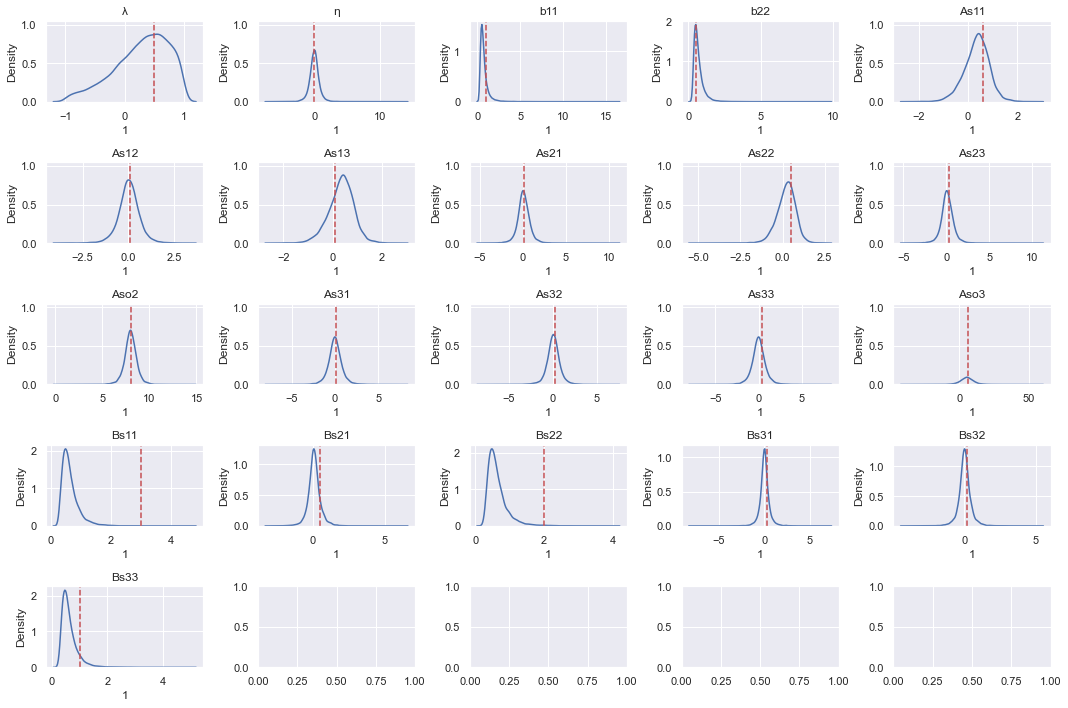

In [58]:
period = 1
fig, axes = plt.subplots(5,5,figsize = (15,10))
for v, ax in enumerate(axes.flatten()):
    if v == 21:
        break
    sns.kdeplot(θ_coll[v].iloc[:,period], ax = ax)
    ax.set_title(θ_name[v])
    ax.vlines(θtrue[v], 0,1, ls = '--', color = 'r',transform=ax.get_xaxis_transform())
    
fig.tight_layout()
# fig.savefig('Simulation.png',dpi = 400, bbox_inches = "tight")

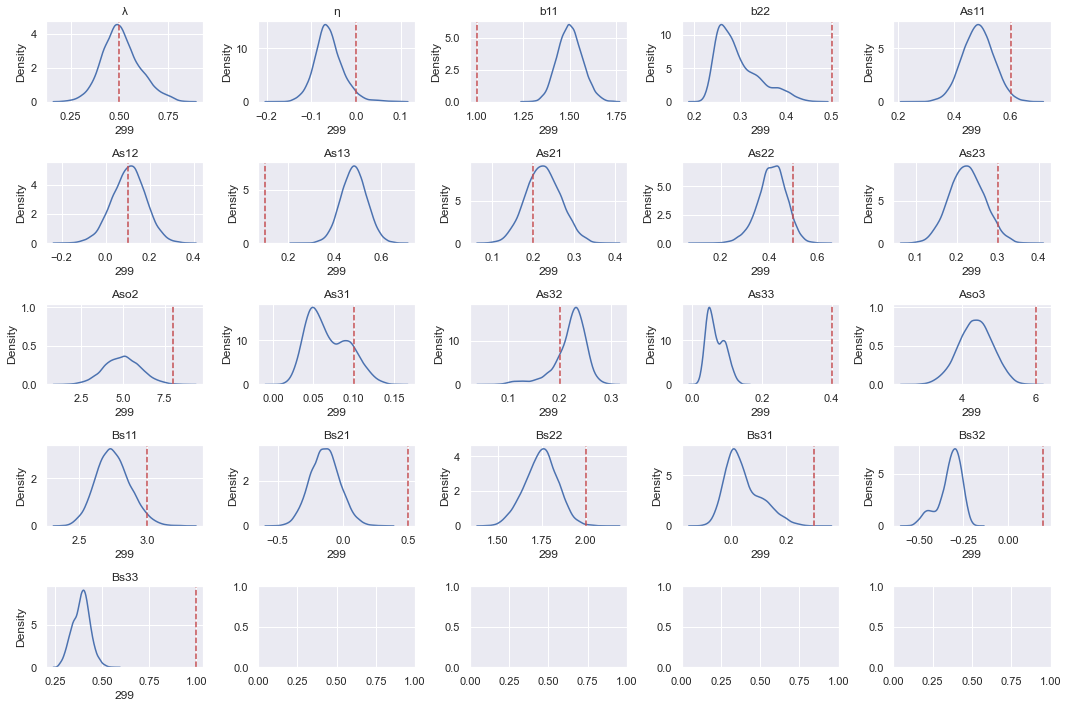

In [10]:
period = 299
fig, axes = plt.subplots(5,5,figsize = (15,10))
for v, ax in enumerate(axes.flatten()):
    if v == 21:
        break
    sns.kdeplot(θ_coll[v].iloc[:,period], ax = ax)
    ax.set_title(θ_name[v])
    ax.vlines(θtrue[v], 0,1, ls = '--', color = 'r',transform=ax.get_xaxis_transform())
    
fig.tight_layout()
# fig.savefig('Simulation.png',dpi = 400, bbox_inches = "tight")

In [11]:
λ_t = [];  η_t = []; b11_t = []; b22_t = []
As11_t = []; As12_t = []; As13_t = [];
As21_t = []; As22_t = []; As23_t = []; 
As31_t = []; As32_t = []; As33_t = [];
Bs11_t = []; Bs21_t = []; Bs22_t = []; Bs31_t = []; Bs32_t = []; Bs33_t = []
for t in range(T):
    λ_t.append(np.sum(w_series[t]*λ_series[t]))
    η_t.append(np.sum(w_series[t]*η_series[t]))
    b11_t.append(np.sum(w_series[t]*b11_series[t]))
    b22_t.append(np.sum(w_series[t]*b22_series[t]))
    As11_t.append(np.sum(w_series[t]*As11_series[t]))
    As12_t.append(np.sum(w_series[t]*As12_series[t]))
    As13_t.append(np.sum(w_series[t]*As13_series[t]))
    As21_t.append(np.sum(w_series[t]*As21_series[t]))
    As22_t.append(np.sum(w_series[t]*As22_series[t]))
    As23_t.append(np.sum(w_series[t]*As23_series[t]))
    As31_t.append(np.sum(w_series[t]*As31_series[t]))
    As32_t.append(np.sum(w_series[t]*As32_series[t]))
    As33_t.append(np.sum(w_series[t]*As33_series[t]))
    Bs11_t.append(np.sum(w_series[t]*Bs11_series[t]))
    Bs21_t.append(np.sum(w_series[t]*Bs21_series[t]))
    Bs22_t.append(np.sum(w_series[t]*Bs22_series[t]))
    Bs31_t.append(np.sum(w_series[t]*Bs31_series[t]))
    Bs32_t.append(np.sum(w_series[t]*Bs32_series[t]))
    Bs33_t.append(np.sum(w_series[t]*Bs33_series[t]))
θ_t = [λ_t, η_t, b11_t, b22_t, \
       As11_t, As12_t, As13_t,\
       As21_t, As22_t, As23_t,\
       As31_t, As32_t, As33_t,\
       Bs11_t, Bs21_t, Bs22_t, Bs31_t, Bs32_t, Bs33_t]

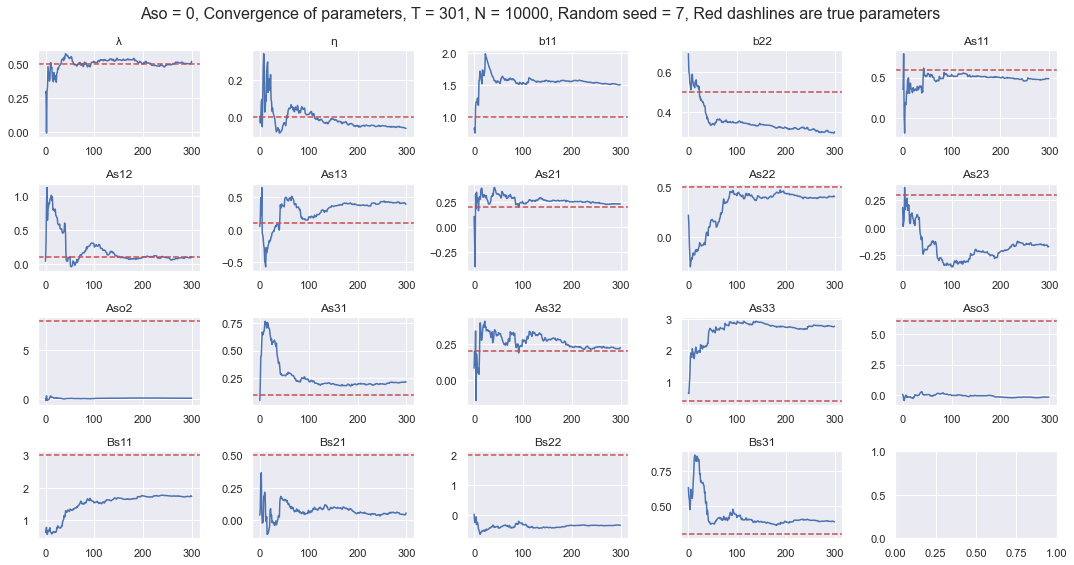

In [12]:
fig, axes = plt.subplots(4,5,figsize = (15,8))
for v, ax in enumerate(axes.flatten()):
    if v == 19:
        break
    ax.plot(θ_t[v])
    ax.set_title(θ_name[v])
    ax.hlines(θtrue[v], 0,300, ls = '--', color = 'r',transform=ax.get_yaxis_transform())
title = 'Aso = 0, Convergence of parameters, T = '+str(T+1)+', N = '+str(N)+', Random seed = '+str(seed)
fig.suptitle( title +', Red dashlines are true parameters', fontsize=16)    
fig.tight_layout()
# fig.savefig(title + '.png',dpi = 400, bbox_inches = "tight")

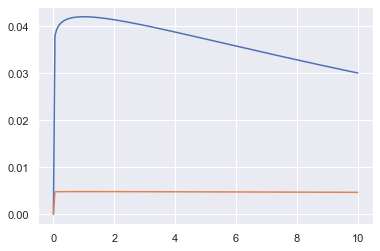

In [69]:
x = np.linspace(0, 10, 200) 
c = 0.1
d = 0.1
y1 = sp.stats.gamma.pdf(x, a=c/2+1, loc = 0, scale = 1/(d/2))
c = 0.01
d = 0.01
y2 = sp.stats.gamma.pdf(x, a=c/2+1, loc = 0, scale = 1/(d/2))
c = 100
d = 100
y3 = sp.stats.gamma.pdf(x, a=c/2+1, loc = 0, scale = 1/(d/2))
c = 300
d = 300
y4 = sp.stats.gamma.pdf(x, a=c/2+1, loc = 0, scale = 1/(d/2))
plt.plot(x, y1)
plt.plot(x, y2)
# plt.plot(x, y3)
# plt.plot(x, y4)